In [1]:
import sys

sys.path.append('/mnt/disk15tb/mmpatil/MEA_Analysis/IPNAnalysis')


In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import helper_functions as helper


spike_times = np.load('/mnt/disk15tb/mmpatil/MEA_Analysis_FEB25/AnalyzedData/CDKL5-E6D_T1_C1/CDKL5-E6D_T1_C1/240523/M07427/Network/000021/well000/spike_times.npy',allow_pickle=True).item()



dict_keys(['prominences', 'left_bases', 'right_bases'])


(0.0, 300.0)

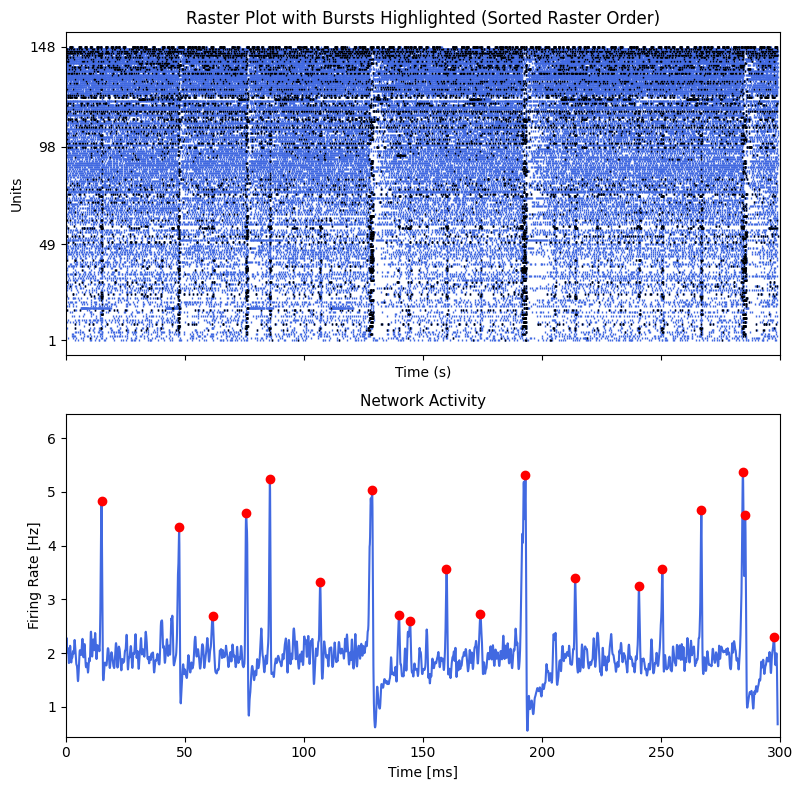

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8),sharex=True)
# Define the ISI threshold for burst detection (e.g., 0.1 seconds)
isi_threshold = 0.1
# Detect bursts for each unit
burst_statistics = helper.detect_bursts_statistics(spike_times, isi_threshold)
bursts = [unit_stats['bursts'] for unit_stats in burst_statistics.values()]
# Extracting ISIs as combined arrays
all_isis_within_bursts = np.concatenate([stats['isis_within_bursts'] for stats in burst_statistics.values() if stats['isis_within_bursts'].size > 0])
all_isis_outside_bursts = np.concatenate([stats['isis_outside_bursts'] for stats in burst_statistics.values() if stats['isis_outside_bursts'].size > 0])
all_isis = np.concatenate([stats['isis_all'] for stats in burst_statistics.values() if stats['isis_all'].size > 0])

# Calculate combined statistics
mean_isi_within_combined = np.mean(all_isis_within_bursts) if all_isis_within_bursts.size > 0 else np.nan
cov_isi_within_combined = np.cov(all_isis_within_bursts) if all_isis_within_bursts.size > 0 else np.nan

mean_isi_outside_combined = np.mean(all_isis_outside_bursts) if all_isis_outside_bursts.size > 0 else np.nan
cov_isi_outside_combined = np.cov(all_isis_outside_bursts) if all_isis_outside_bursts.size > 0 else np.nan

mean_isi_all_combined = np.mean(all_isis) if all_isis.size > 0 else np.nan
cov_isi_all_combined = np.cov(all_isis) if all_isis.size > 0 else np.nan

# Calculate spike counts for each unit
spike_counts = {unit: len(times) for unit, times in spike_times.items()}

# Sort units by ascending spike counts
sorted_units = sorted(spike_counts, key=spike_counts.get)

axs[0]= helper.plot_raster_with_bursts(axs[0],spike_times, bursts,sorted_units=sorted_units, title_suffix="(Sorted Raster Order)")

# Call the plot_network_activity function and pass the SpikeTimes dictionary
axs[1],network_data= helper.plot_network_activity(axs[1],spike_times, figSize=(8, 4),binSize=0.1, gaussianSigma=0.2,min_peak_distance=10, thresholdBurst=2)


plt.tight_layout()
plt.xlim(0, 300)